In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
dataset = pd.read_csv("qsar-fish-toxicity1.csv")
dataset.head(10)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
5,3.222,0.331,2.177,0,0,0.706,1.819
6,3.179,0.000,1.063,0,0,2.942,3.947
7,3.000,0.000,0.938,1,0,2.851,3.513
8,2.620,0.499,0.990,0,0,2.942,4.402
9,2.834,0.134,0.950,0,0,1.591,3.021


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                908 non-null    float64
 1   SM1_Dz(Z)           908 non-null    float64
 2   GATS1i              908 non-null    float64
 3   NdsCH               908 non-null    int64  
 4   NdssC               908 non-null    int64  
 5   MLOGP               908 non-null    float64
 6   LC50 [-LOG(mol/L)]  908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [8]:
dataset.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [9]:
dataset.corr(method="pearson")


,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz(Z),-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
LC50 [-LOG(mol/L)],0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


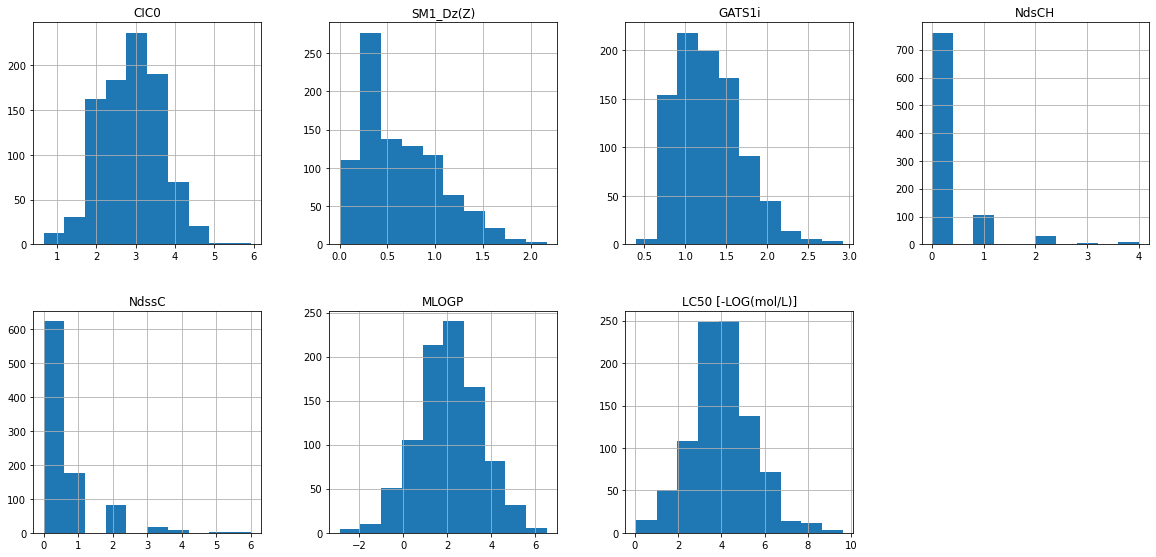

In [10]:
dataset.hist(figsize=(20, 20), layout=(4, 4));

In [11]:
X = dataset.drop(["LC50 [-LOG(mol/L)]"], axis=1)
y = pd.DataFrame(dataset["LC50 [-LOG(mol/L)]"].copy())

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [13]:
scaler = StandardScaler()

In [14]:
knn_result = []

for k in range (2, 10):
    clf = Pipeline([
        ("scaler", scaler),
        ("knn", KNeighborsRegressor(n_neighbors=k))
        ])
    clf.fit(X_train, y_train)
    cross_val = cross_val_score(clf, X, y, cv=10)
    cross_val_avg = cross_val.mean()
    knn_result.append(cross_val_avg)
    print(f"R-Squared for k = {k} : {cross_val_avg:.3f}")

R-Squared for k = 2 : 0.501
R-Squared for k = 3 : 0.549
R-Squared for k = 4 : 0.575
R-Squared for k = 5 : 0.589
R-Squared for k = 6 : 0.583
R-Squared for k = 7 : 0.586
R-Squared for k = 8 : 0.590
R-Squared for k = 9 : 0.591


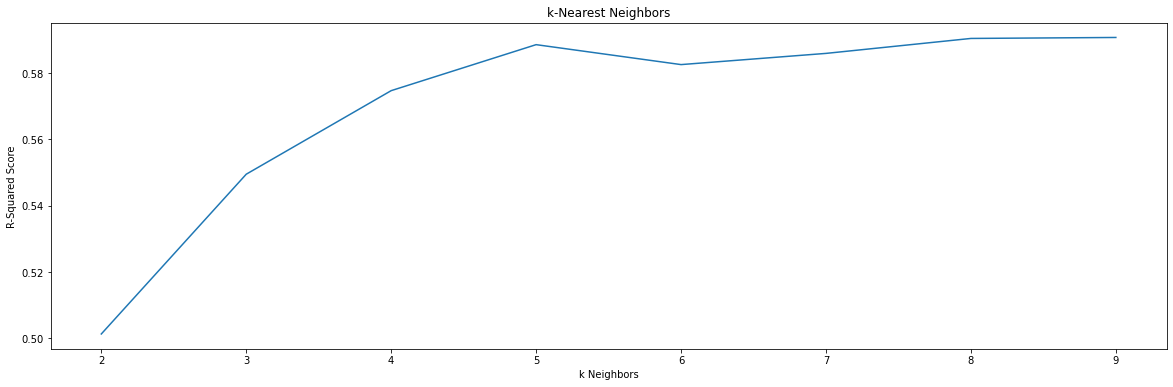

In [15]:
plt.figure(figsize=(20,6))
plt.plot([i for i in range(2, 10)], knn_result)
plt.xlabel("k Neighbors")
plt.ylabel("R-Squared Score")
plt.title("k-Nearest Neighbors")
plt.show()

In [16]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
knn_training_pred = knn.predict(X_train)
knn_training_rsq = knn.score(X_train, y_train)
knn_training_rmse = np.sqrt(mean_squared_error(y_train, knn_training_pred))

print(f"R-Squared for the training set : {knn_training_rsq:.3f}")
print(f"RMSE for the training set : {knn_training_rmse:.3f}")

R-Squared for the training set : 0.683
RMSE for the training set : 0.805


In [17]:
knn_testing_pred = knn.predict(X_test)
knn_testing_rsq = knn.score(X_test, y_test)
knn_testing_rmse = np.sqrt(mean_squared_error(y_test, knn_testing_pred))

print(f"R-Squared for the testing set : {knn_testing_rsq:.3f}")
print(f"RMSE for the testing set : {knn_testing_rmse:.3f}")

R-Squared for the testing set : 0.599
RMSE for the testing set : 0.985


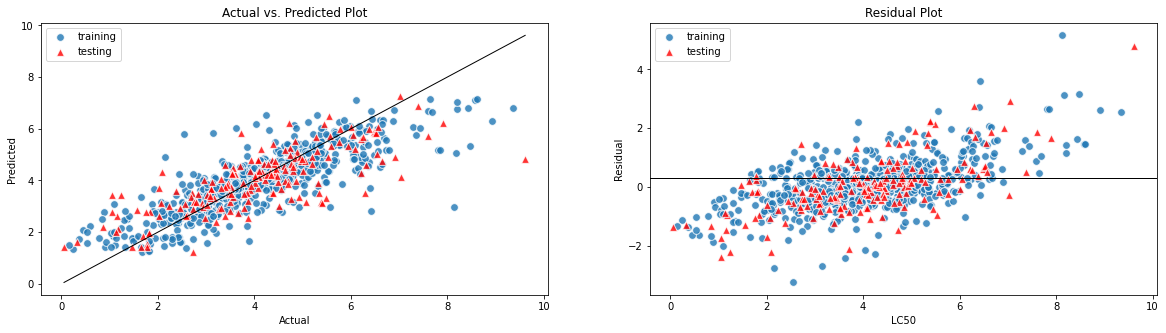

In [18]:
residual_train = y_train - knn_training_pred
residual_test = y_test - knn_testing_pred

fig=plt.figure(figsize=(20,5))

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, knn_training_pred, s=60, alpha=0.8, edgecolor="white", label="training")
ax1.scatter(y_test, knn_testing_pred, marker="^", s=60, c="r", alpha=0.8, edgecolor="white", label="testing")
ax1.plot([y.min(), y.max()], [y.min(), y.max()], "k", lw=1)
ax1.set_title("Actual vs. Predicted Plot")
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.scatter(y_train, residual_train, s=60, edgecolor="white", alpha=0.8, label="training")
ax2.scatter(y_test, residual_test, marker="^", s=60, c="r", edgecolor="white", alpha=0.8, label="testing")
ax2.axhline(y=0.3, linewidth= 1, linestyle="-", c="black")
ax2.legend()
ax2.set_title("Residual Plot")
ax2.set_xlabel("LC50")
ax2.set_ylabel("Residual")

plt.show()